In [76]:
import pandas as pd
import pingouin as pg
import scipy

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, 
                                         MultiComparison)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('5_task_1.csv')
df_2 = pd.read_csv('5_task_2.csv')

In [11]:
df_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [31]:
a = df_1.query("group == 'A'").events
b = df_1.query("group == 'B'").events
c = df_1.query("group == 'C'").events

In [32]:
#проверяем на гомогенность дисперсии
scipy.stats.levene(df_1.query("group == 'A'").events, df_1.query("group == 'B'").events, df_1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

не отклоняем нулевую гипотезу (т.е. Дисперсии гомогенны т.е. одинаковы)

In [34]:
#проверка на нормальность группы A ()

scipy.stats.normaltest(a)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [35]:
#проверка на нормальность группы B

scipy.stats.normaltest(b)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [36]:
#проверка на нормальность группы C

scipy.stats.normaltest(c)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

Все 3 группы распределены нормально (p_value > 0.05)

In [37]:
#сравниваем средние однофакторным дисперсионным анализом
stats.f_oneway(a,b,c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

В целом, различия между средними имеются (но конкретно между какими группами - не знаем)

In [42]:
# Проводим тест Тьюки на проверку различий между группами
print(pairwise_tukeyhsd(df_1.events, df_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Различия есть между всеми группами. И, на основе стобца meandiff, делаем вывод, что будем использовать вариант B

In [65]:
df_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


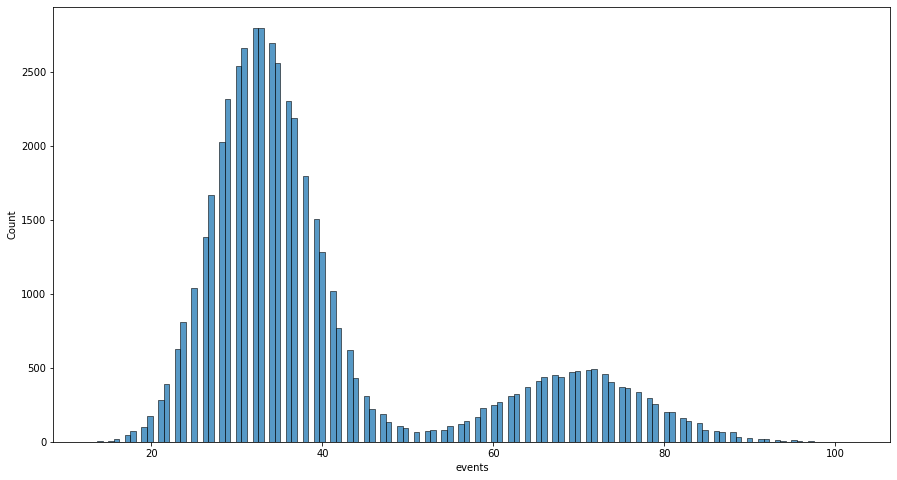

In [58]:
plt.figure(figsize=(15,8))
sns.histplot(df_2.query("group == 'test'"), x='events')

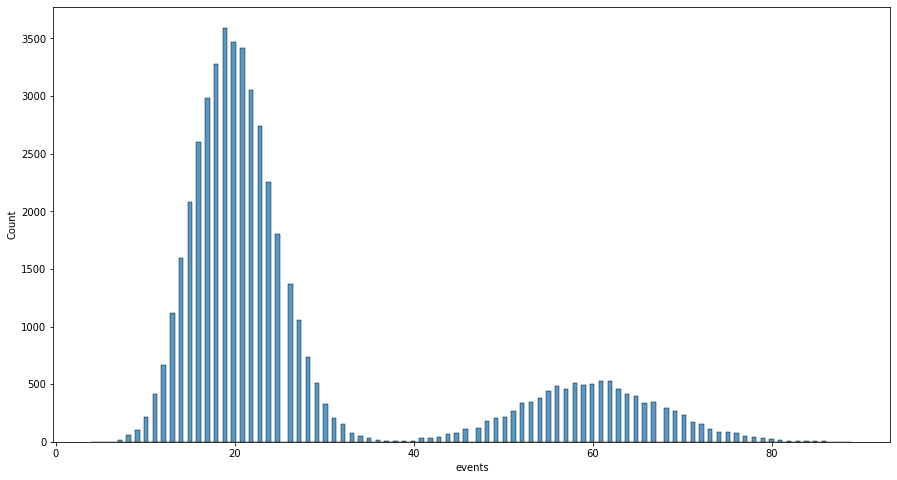

In [59]:
plt.figure(figsize=(15,8))
sns.histplot(df_2.query("group == 'control'"), x='events')

In [67]:
# Найти описательные статистики для каждой из групп и сегментов пользователей
test_low = df_2.query("group =='test' and segment == 'low'")
test_high = df_2.query("group =='test' and segment == 'high'")

control_low = df_2.query("group =='control' and segment == 'low'")
control_high = df_2.query("group =='control' and segment == 'high'")

In [75]:
print("test_low")
print(test_low.describe())
print()
print("test_high")
print(test_high.describe())
print()
print("control_low")
print(control_low.describe())
print()
print("control_high")
print(control_high.describe())

test_low
                 id        events
count  40000.000000  40000.000000
mean   49913.343600     33.025925
std    28917.383492      5.720845
min        1.000000     13.000000
25%    24763.750000     29.000000
50%    49706.500000     33.000000
75%    75127.250000     37.000000
max    99995.000000     59.000000

test_high
                 id        events
count  10000.000000  10000.000000
mean   50126.620600     69.938500
std    28821.133487      8.403974
min       14.000000     40.000000
25%    25317.500000     64.000000
50%    50234.500000     70.000000
75%    74783.250000     76.000000
max    99996.000000    102.000000

control_low
                 id        events
count  40000.000000  40000.000000
mean   49935.256700     20.031575
std    28855.849243      4.473576
min        0.000000      4.000000
25%    25022.250000     17.000000
50%    49944.500000     20.000000
75%    74874.250000     23.000000
max    99999.000000     41.000000

control_high
                 id        events
c

In [84]:
formula = 'df_2.events ~ df_2.group + df_2.segment + df_2.group:df_2.segment'
model = ols(formula, df_2).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
df_2.group,3.837195e+06,1.0,112031.864119,0.000000e+00
df_2.segment,2.362480e+07,1.0,689756.377484,0.000000e+00
df_2.group:df_2.segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [85]:
#объединим 2 колонки в одну для дальнейшего теста
df_2['combination'] = df_2.group + '/' + df_2.segment
df_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [81]:
# Проводим тест Тьюки на проверку различий между группами
print(pairwise_tukeyhsd(df_2.events, df_2.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

Разница между control/high и test/high составила около 10

Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

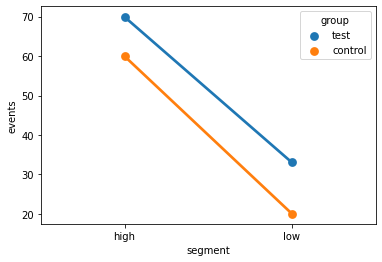

In [87]:
sns.pointplot(data=df_2, x='segment', y='events', hue='group')

Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО.

Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: 
ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.